# Mobile Review dataset

## Import

In [6]:
!pip install opendatasets

In [7]:
import pandas as pd
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import gensim
import numpy as np

In [8]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
#import Coherence model from gensim
from gensim.models import CoherenceModel

In [10]:
pip install pandas==1.5.1

  Using cached pandas-1.5.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 1.5.1 which is incompatible.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.1 which is incompatible.


In [11]:
!pip install pyLDAvis

  Using cached pandas-2.1.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.3 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.1
    Uninstalling pandas-1.5.1:
      Successfully uninstalled pandas-1.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
bigframes 0.17.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.1.4 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.4 which is incompatible.


In [12]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this

## Read dataset

In [13]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/abhiram8/lenovok8review')

Skipping, found downloaded files in "./lenovok8review" (use force=True to force download)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
reviews = pd.read_csv('/content/lenovok8review/K8 Reviews v0.2.csv', delimiter=',',engine='python')
reviews.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...


## EDA

In [43]:
def data_EDA(data, col):
  print("Shape of data=>",data.shape)
  print('-----------')

  print(f"Check non -> /n {data.isnull().sum()}")
  print('-----------')

  print("CHECK duplicated-> " , data[col].duplicated().sum())
  print('-----------')

  data['lenght'] = data[col].str.len()
  print('Length of a sample comment:', data['lenght'].min())
  print('Length of a sample comment:', data['lenght'].max())
  print('Length of a sample comment:', data['lenght'].mean())
  print('-----------')

  data['word_count'] = [len(i.split()) for i in data[col]]
  print('word_count of a sample comment:', data['word_count'].min())
  print('word_count of a sample comment:', data['word_count'].max())
  print('word_count of a sample comment:', data['word_count'].mean())
  return data['word_count']



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
def count(corpus, col):
  corpus_splited = corpus[col].str.split()
  corpus = [word for sentance_splited in  corpus_splited for word in sentance_splited]
  unique_words = set(corpus)
  print(f"corpus unique vocab: {len(unique_words)}")
  mostCommon = Counter(corpus).most_common(30)
#  print(f"most_Common vocab:{mostCommon}")
  return mostCommon

def plot_words(mostCommon):
  words = []
  freq = []
  for word, count in mostCommon[:10]:
      words.append(word)
      freq.append(count)
  sns.barplot(x=freq, y=words)
  plt.title('Top 10 Most Frequently Occuring Words')
  plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
word_count = data_EDA(reviews, 'review')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Shape of data=> (12433, 3)
-----------
Check non -> /n sentiment         0
review            0
processed_docs    0
dtype: int64
-----------
CHECK duplicated->  47
-----------
Length of a sample comment: 5
Length of a sample comment: 647
Length of a sample comment: 106.10978846617871
-----------
word_count of a sample comment: 2
word_count of a sample comment: 100
word_count of a sample comment: 18.46851122013995


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='word_count', ylabel='Count'>

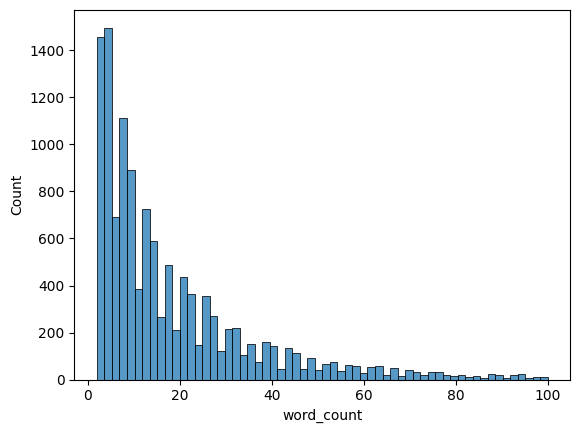

In [46]:
sns.histplot(data=word_count)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

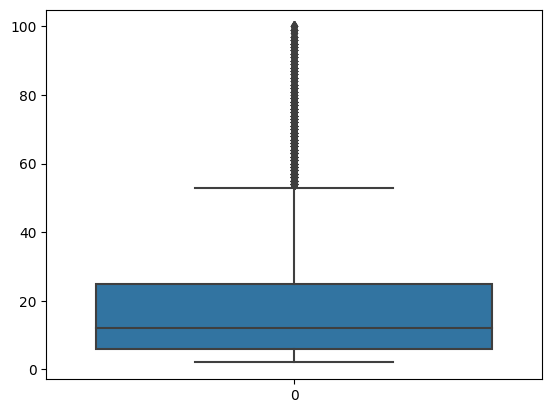

In [47]:
sns.boxplot(data=word_count)

In [48]:
mostCommon = count(reviews, 'review')
mostCommon

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


corpus unique vocab: 25304


[('is', 8596),
 ('not', 4469),
 ('the', 3962),
 ('and', 3961),
 ('phone', 3754),
 ('to', 3423),
 ('this', 3107),
 ('good', 2861),
 ('in', 2727),
 ('I', 2678),
 ('for', 2320),
 ('very', 2307),
 ('it', 2277),
 ('a', 2274),
 ('of', 2117),
 ('battery', 1891),
 ('but', 1865),
 ('with', 1836),
 ('camera', 1830),
 ('mobile', 1384),
 ('product', 1162),
 ('as', 1032),
 ('on', 1018),
 ('Lenovo', 1017),
 ('are', 992),
 ('buy', 969),
 ('quality', 965),
 ('have', 897),
 ('my', 896),
 ('problem', 880)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Ser

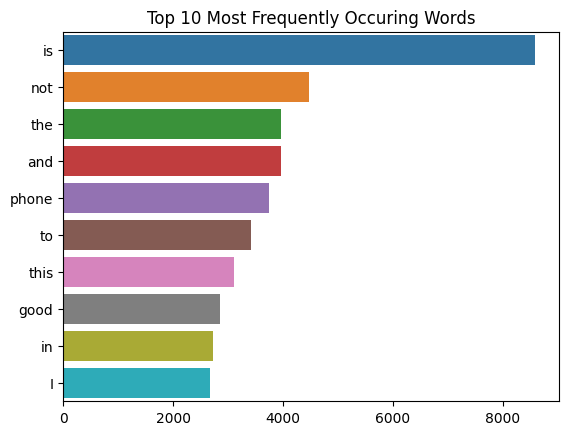

In [49]:
plot_words(mostCommon)

**NOTES**

too long sentances outliers

show and drop dublicate

Need to remove stopwords

## Preprocess

In [22]:
reviews.drop_duplicates(inplace=True)
len(reviews)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


13036

In [23]:
reviews.drop(labels=reviews[reviews['word_count'] > 100].index, axis=0, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
reviews.drop(labels=reviews[reviews['word_count'] < 2].index, axis=0, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
reviews.drop(['lenght', 'word_count'], axis=1, inplace=True )

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
reviews.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
4,0,The worst phone everThey have changed the last...
5,0,Only I'm telling don't buyI'm totally disappoi...


add my stopwords

In [27]:
'''
Write a function to proprocess the entire dataset
'''
# tokenize with gensim --> remove stopwords nltk and letters --> lemmitize nltk
stemmer = SnowballStemmer('english')

def lemmatize_stemming(text):
    '''This function will lemmatize on Noun POS and stem the text'''
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='n'))
    #return (WordNetLemmatizer().lemmatize(text,pos='n'))

#tokenize and lemmatize
def preprocess(text):
    '''Function to break into word tokens, remove stopwords, remove short words and finally to lemmatize and stem the individual tokens'''
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
reviews['processed_docs']= reviews['review'].apply(lambda x: preprocess(x))
reviews['processed_docs']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0                              [good, need, updat, improv]
1        [worst, mobil, bought, batteri, drain, like, h...
2                                          [cash, januari]
4        [worst, phone, everthey, chang, phone, problem...
5        [tell, buyi, total, batterypoor, camerawast, m...
                               ...                        
14670             [like, phone, work, fine, whater, phone]
14671    [lenovo, note, awesom, take, best, pictur, dua...
14672                               [awesom, gaget, price]
14673    [phone, nice, process, success, dual, camera, ...
14674                               [good, product, pakeg]
Name: processed_docs, Length: 12433, dtype: object

### BOW

In [29]:
dictionary = gensim.corpora.Dictionary(reviews['processed_docs'])

for key, value in list(dictionary.items())[:10]:
  print(key , value)


0 good
1 improv
2 need
3 updat
4 amazon
5 backup
6 batteri
7 biggest
8 booster
9 bought


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


note: stem not very good option try lemmitization not stemming

**Gensim filter extremes**

In [30]:
dictionary.filter_extremes(no_below=5,no_above=0.1,keep_n=None)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
reviews["processed_docs"].head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0                          [good, need, updat, improv]
1    [worst, mobil, bought, batteri, drain, like, h...
2                                      [cash, januari]
4    [worst, phone, everthey, chang, phone, problem...
5    [tell, buyi, total, batterypoor, camerawast, m...
Name: processed_docs, dtype: object

In [32]:
bow_corpus = [dictionary.doc2bow(txt) for txt in reviews["processed_docs"]]
bow_corpus[:5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[(0, 1), (1, 1), (2, 1)],
 [(3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 2),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 2),
  (21, 2),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1)],
 [(28, 1), (29, 1)],
 [(3, 2), (27, 1), (30, 1), (31, 1), (32, 1), (33, 1)],
 [(34, 1), (35, 1), (36, 1)]]

In [33]:
#check randomly any of the reviews
random = np.random.randint(1,len(reviews))
document_num = random

bow_doc_x = bow_corpus[random]

for i in range(len(bow_doc_x)):
    print(f'Word {bow_doc_x[i][0]} -> {dictionary[bow_doc_x[i][0]]} appears {bow_doc_x[i][1]} times')

Word 33 -> return appears 1 times
Word 56 -> item appears 1 times
Word 248 -> want appears 1 times


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Apply LDA

In [34]:
!pip install pandas

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
#apply the gensim LDA model and generate 12 topics from the corpus
SEED = 41
num = [i for i in range(3, 15)]
lda_model = gensim.models.LdaMulticore(corpus=bow_corpus,
                                       num_topics=12,
                                       id2word=dictionary,
                                       passes=10,
                                       workers=2,
                                       random_state=SEED,
                                       minimum_probability=0.05,
                                       alpha='symmetric')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
#For each topic, explore each word and its relative weight in the topic

for idx,topic in lda_model.print_topics(-1,num_words=15):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.207*"nice" + 0.097*"price" + 0.044*"overal" + 0.028*"featur" + 0.027*"deliveri" + 0.023*"issu" + 0.021*"rang" + 0.020*"awesom" + 0.018*"specif" + 0.016*"thank" + 0.016*"time" + 0.014*"perform" + 0.013*"mark" + 0.012*"star" + 0.012*"worth"


Topic: 1 
Words: 0.102*"great" + 0.068*"expect" + 0.054*"look" + 0.050*"money" + 0.040*"valu" + 0.030*"perform" + 0.026*"killer" + 0.024*"featur" + 0.016*"like" + 0.016*"qualiti" + 0.014*"disappoint" + 0.014*"clariti" + 0.014*"purchas" + 0.013*"amaz" + 0.012*"display"


Topic: 2 
Words: 0.086*"excel" + 0.046*"love" + 0.036*"satisfi" + 0.031*"superb" + 0.031*"price" + 0.027*"fine" + 0.024*"backup" + 0.023*"amaz" + 0.022*"perform" + 0.021*"perfect" + 0.021*"awesom" + 0.018*"android" + 0.017*"smooth" + 0.015*"experi" + 0.015*"stock"


Topic: 3 
Words: 0.070*"screen" + 0.055*"wast" + 0.039*"cast" + 0.037*"money" + 0.030*"like" + 0.025*"dolbi" + 0.022*"speaker" + 0.017*"time" + 0.016*"automat" + 0.015*"option" + 0.014*"dont" + 0.014*"s

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
#compute coherence score
lda_model_coherence = CoherenceModel(model=lda_model,
                                     texts=reviews["processed_docs"],
                                     dictionary=dictionary,
                                     coherence='c_v')

coherence_lda = lda_model_coherence.get_coherence()
print('\nCoherence Score:',coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score: 0.5186014575351879


### TRIALS for Best LDA

In [38]:
def compute_coherence_score(corpus,dictionary,NUM,ALPHA):
    #instantiate the model instance based on k,a and b
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=NUM,
                                           alpha=ALPHA,
                                           passes=10,
                                           random_state=SEED)
    lda_model_coherence = CoherenceModel(model=lda_model,
                                        texts=reviews["processed_docs"],
                                        dictionary=dictionary,
                                        coherence='c_v')
    return lda_model_coherence.get_coherence()

#search for the best alpha and the number of topics --> one with the highest coherence score will be the best hyperparameter
alpha =['symmetric','asymmetric']

for x in alpha:
    print('Coherence Model with alpha = {}'.format(x))
    print('-------------------------------------------')
    print('\n')
    for i in range(5,10):
        score = compute_coherence_score(corpus=bow_corpus,
                                        dictionary=dictionary,
                                        NUM=i,
                                        ALPHA=x)
        print(f'Coherence score with {i} topics is {score}')
        print('\n')

Coherence Model with alpha = symmetric
-------------------------------------------




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherence score with 5 topics is 0.5518807694046391


Coherence score with 6 topics is 0.5462379679131241


Coherence score with 7 topics is 0.5154562908607806


Coherence score with 8 topics is 0.504926600491131


Coherence score with 9 topics is 0.5311070171463051


Coherence Model with alpha = asymmetric
-------------------------------------------


Coherence score with 5 topics is 0.5864816796509851


Coherence score with 6 topics is 0.5555843602318559


Coherence score with 7 topics is 0.5473648318266935


Coherence score with 8 topics is 0.536157387105018


Coherence score with 9 topics is 0.5517241101102318




In [39]:
def explore_words(lda_model = lda_model, NUM_WORDS = 15):
#For each topic, explore each word and its relative weight in the topic

  for idx,topic in lda_model.print_topics(-1, num_words = NUM_WORDS):
      print("Topic: {} \nWords: {}".format(idx, topic))
      print("\n")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [64]:
lda_model_final = gensim.models.LdaMulticore(corpus=bow_corpus,num_topics=10,id2word=dictionary,passes=10,workers=2,alpha='asymmetric')

In [41]:
from pprint import pprint
# Print the Keyword in the 7 topics
pprint(lda_model_final.print_topics())
doc_lda = lda_model_final[bow_corpus]

[(0,
  '0.035*"money" + 0.024*"issu" + 0.023*"amazon" + 0.022*"wast" + '
  '0.020*"expect" + 0.016*"devic" + 0.014*"worth" + 0.014*"love" + '
  '0.013*"valu" + 0.013*"deliveri"'),
 (1,
  '0.035*"screen" + 0.034*"time" + 0.031*"charger" + 0.023*"turbo" + '
  '0.023*"issu" + 0.022*"hour" + 0.021*"take" + 0.021*"note" + 0.020*"month" + '
  '0.016*"cast"'),
 (2,
  '0.035*"updat" + 0.029*"drain" + 0.026*"fast" + 0.020*"note" + 0.019*"mode" '
  '+ 0.019*"featur" + 0.017*"like" + 0.017*"issu" + 0.015*"dual" + '
  '0.014*"softwar"'),
 (3,
  '0.110*"nice" + 0.092*"qualiti" + 0.064*"perform" + 0.054*"backup" + '
  '0.037*"poor" + 0.027*"overal" + 0.027*"game" + 0.024*"look" + 0.022*"sound" '
  '+ 0.020*"issu"'),
 (4,
  '0.087*"great" + 0.058*"network" + 0.048*"connect" + 0.034*"proper" + '
  '0.029*"bluetooth" + 0.020*"signal" + 0.020*"time" + 0.019*"like" + '
  '0.016*"wifi" + 0.014*"voic"'),
 (5,
  '0.097*"worst" + 0.046*"amazon" + 0.040*"return" + 0.035*"speaker" + '
  '0.034*"servic" + 0.028

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [65]:
# visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(topic_model = lda_model_final,corpus = bow_corpus, dictionary = dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.240827  0.057502       1        1  19.080917
1     -0.121257  0.065631       2        1  14.495467
2     -0.092506  0.117095       3        1  13.469317
3     -0.118712  0.091792       4        1   9.852891
9     -0.044228 -0.252553       5        1   8.203456
5     -0.084583 -0.203899       6        1   8.181911
4      0.228582  0.063652       7        1   7.698140
6      0.102240  0.056339       8        1   7.089957
7      0.072952 -0.125155       9        1   6.229813
8     -0.183316  0.129595      10        1   5.698131, topic_info=       Term         Freq        Total Category  logprob  loglift
143    nice  1033.000000  1033.000000  Default  30.0000  30.0000
103   price   912.000000   912.000000  Default  29.0000  29.0000
73     best   826.000000   826.000000  Default  28.0000  28.0000
102    fast   739.000000   739.000000  Default  27.0000  27.0000
40     note  1074.000000  1074.000000  Default  26.0000  26.0000
..      ...          ...          ...      ...      ...      ...
897    cell    36.496303    66.346189  Topic10  -4.7641   2.2674
58     poor    81.167025   817.362615  Topic10  -3.9648   0.5555
124     day    58.900146   348.889884  Topic10  -4.2854   1.0861
6    bought    41.577091   256.902153  Topic10  -4.6337   1.0439
450   power    37.782289   118.586073  Topic10  -4.7294   1.7212

[650 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
1298      1  0.951639    abhi
409       3  0.067741     abl
409       4  0.033870     abl
409       6  0.779019     abl
409       8  0.011290     abl
...     ...       ...     ...
48        2  0.953137    year
48       10  0.034041    year
286       6  0.974524  yellow
416       1  0.170705    zoom
416       9  0.814132    zoom

[1338 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 10, 6, 5, 7, 8, 9])

# Apply BERTOPIC

In [50]:
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 54.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 7.5 MB/s eta 0:00:00
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039295 sha256=35e4b71a91dc72d2f3a03963dce32e1aef14907bebfe80ed7f0f29bf28bfd06f
  Stored in di

**NOTE: HERE INPUT without any processing**

next try to (stopwords and stemming)

In [52]:
reviews["review"]

0                   Good but need updates and improvements
1        Worst mobile i have bought ever, Battery is dr...
2        when I will get my 10% cash back.... its alrea...
4        The worst phone everThey have changed the last...
5        Only I'm telling don't buyI'm totally disappoi...
                               ...                        
14670    I really like the phone, Everything is working...
14671    The Lenovo K8 Note is awesome. It takes best p...
14672                         Awesome Gaget.. @ this price
14673    This phone is nice processing will be successf...
14674        Good product but the pakeging was not enough.
Name: review, Length: 12433, dtype: object

**CountVectorizer**

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_model = CountVectorizer(stop_words="english")

**ctfidf_model**

In [54]:
from bertopic.vectorizers import ClassTfidfTransformer

ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)
#ctfidf_model=ctfidf_model

we limit the number of duplicate words we find in each topic. This is done using an algorithm called Maximal Marginal Relevance which compares word embeddings with the topic embedding.

it is necessary to pass the embedding model to BERTopic if you are using pre-computed embeddings

In [55]:
from bertopic.representation import MaximalMarginalRelevance

representation_model = MaximalMarginalRelevance(diversity=0.2)  # with 0 being ((not at all)) diverse and 1 being ((completely)) diverse:
#representation_model=representation_model
#if pre-computed embeddings --> add embedding_model=sentence_model

In [81]:
%%time
from bertopic import BERTopic
model = BERTopic(verbose=True,embedding_model='all-MiniLM-L6-v2', top_n_words=10, ctfidf_model=ctfidf_model, representation_model=representation_model, min_topic_size= 55) # n_gram_range = 2,
headline_topics, _ = model.fit_transform(reviews["review"])

2023-12-26 20:55:35,195 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/389 [00:00<?, ?it/s]

2023-12-26 20:55:43,492 - BERTopic - Embedding - Completed ✓
2023-12-26 20:55:43,494 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2023-12-26 20:55:56,282 - BERTopic - Dimensionality - Completed ✓
2023-12-26 20:55:56,285 - BERTopic - Cluster - Start clustering the reduced embeddings
2023-12-26 20:55:56,888 - BERTopic - Cluster - Completed ✓
2023-12-26 20:55:56,898 - BERTopic - Representation - Extracting topics from clusters using representation models.
2023-12-26 20:55:58,328 - BERTopic - Representation - Completed ✓


CPU times: user 28.6 s, sys: 1.65 s, total: 30.2 s
Wall time: 23.5 s


In [82]:
freq = model.get_topic_info()
print("Number of topics: {}".format( len(freq)))
freq

Number of topics: 29


,Topic,Count,Name,Representation,Representative_Docs
0,-1,3113,-1_charging_battery_issue_charger,"[charging, battery, issue, charger, heating, b...","[After 7 month of usage, i am writing this.Alr..."
1,0,1958,0_price_delivery_performance_satisfied,"[price, delivery, performance, satisfied, very...","[Best at this price.. value for money, Very go..."
2,1,1694,1_price_camera_budget_phone,"[price, camera, budget, phone, quality, front,...",[Best Phone at best price......Phone functioni...
3,2,1438,2_lenovo_k8_note_k4,"[lenovo, k8, note, k4, k5, service, buy, have,...",[The mobile has some good features. But chargi...
4,3,776,3_camera_quality_dual_front,"[camera, quality, dual, front, performance, ca...","[At this price, its worth buying when you comp..."
5,4,337,4_mobile_futures_mobiles_superb,"[mobile, futures, mobiles, superb, mobil, amaz...",[It's a excilent product. Super fast. Nicly bu...
6,5,220,5_hai_ka_nahi_bhi,"[hai, ka, nahi, bhi, bekar, hota, raha, ghatiy...","[Ghatiya phone hai, screen resolution ekdam ba..."
7,6,217,6_heating_heat_heated_issue,"[heating, heat, heated, issue, overheating, ho...","[Heating problem...Over heating..But its good,..."
8,7,216,7_earphone_ear_headphone_headset,"[earphone, ear, headphone, headset, earphones,...","[Received it today, the first thing i noticed ..."
9,8,202,8_heating_camera_drainage_heats,"[heating, camera, drainage, heats, quality, dr...",[Camera AverageBatery drain out more faster th...


In [83]:
a_topic = freq.iloc[1]["Topic"] # Select the 1st topic
model.get_topic(a_topic) # Show the words and their c-TF-IDF scores

[('price', 0.2655854561034543),
 ('delivery', 0.2610904423576691),
 ('performance', 0.23030712662773103),
 ('satisfied', 0.22385254994263434),
 ('very', 0.21277629405467183),
 ('delivered', 0.21195319388270628),
 ('expectations', 0.19980684290020223),
 ('amazon', 0.1993101210568338),
 ('bed', 0.1991816509438718),
 ('features', 0.19382409314716723)]

**VIP: STOP words**

**NOTE:** remove review which contain only 1 word

### Visualize

In [84]:
model.visualize_barchart(top_n_topics=33)


In [85]:
model.visualize_topics()

In [86]:
model.visualize_hierarchy(top_n_topics=15)

In [87]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordcloud(model, topic):
    text = {word: value for word, value in model.get_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()


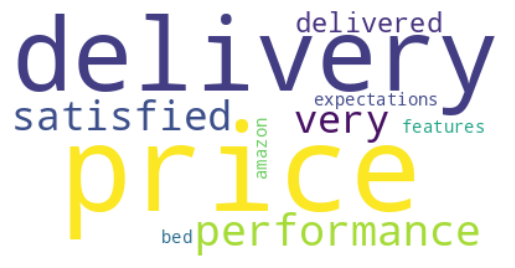

In [88]:
create_wordcloud(model, topic=0)

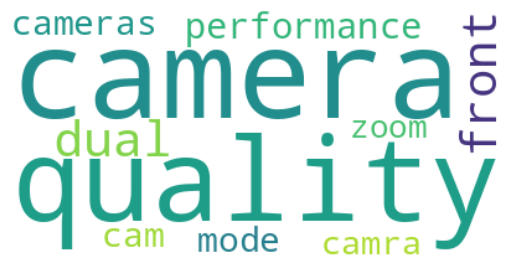

In [89]:
create_wordcloud(model, topic=3)

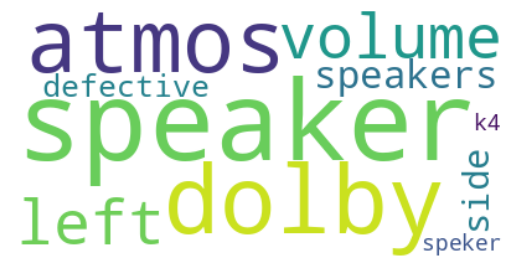

In [91]:
create_wordcloud(model, topic=9)

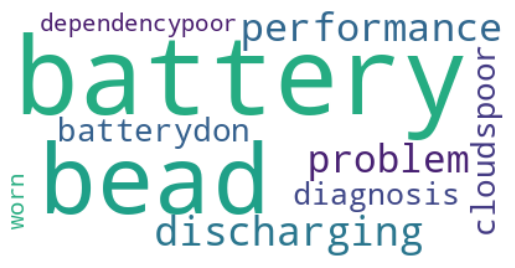

In [94]:
create_wordcloud(model, topic=13)

**Humman visualize**

In [92]:
document_info = model.get_document_info(reviews["review"])
document_info

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,Good but need updates and improvements,0,0_price_delivery_performance_satisfied,"[price, delivery, performance, satisfied, very...","[Best at this price.. value for money, Very go...",price - delivery - performance - satisfied - v...,0.878679,False
1,"Worst mobile i have bought ever, Battery is dr...",2,2_lenovo_k8_note_k4,"[lenovo, k8, note, k4, k5, service, buy, have,...",[The mobile has some good features. But chargi...,lenovo - k8 - note - k4 - k5 - service - buy -...,1.000000,False
2,when I will get my 10% cash back.... its alrea...,0,0_price_delivery_performance_satisfied,"[price, delivery, performance, satisfied, very...","[Best at this price.. value for money, Very go...",price - delivery - performance - satisfied - v...,0.466784,False
3,The worst phone everThey have changed the last...,-1,-1_charging_battery_issue_charger,"[charging, battery, issue, charger, heating, b...","[After 7 month of usage, i am writing this.Alr...",charging - battery - issue - charger - heating...,0.000000,False
4,Only I'm telling don't buyI'm totally disappoi...,3,3_camera_quality_dual_front,"[camera, quality, dual, front, performance, ca...","[At this price, its worth buying when you comp...",camera - quality - dual - front - performance ...,0.726899,False
...,...,...,...,...,...,...,...,...
12428,"I really like the phone, Everything is working...",-1,-1_charging_battery_issue_charger,"[charging, battery, issue, charger, heating, b...","[After 7 month of usage, i am writing this.Alr...",charging - battery - issue - charger - heating...,0.000000,False
12429,The Lenovo K8 Note is awesome. It takes best p...,2,2_lenovo_k8_note_k4,"[lenovo, k8, note, k4, k5, service, buy, have,...",[The mobile has some good features. But chargi...,lenovo - k8 - note - k4 - k5 - service - buy -...,0.966684,False
12430,Awesome Gaget.. @ this price,0,0_price_delivery_performance_satisfied,"[price, delivery, performance, satisfied, very...","[Best at this price.. value for money, Very go...",price - delivery - performance - satisfied - v...,0.936219,False
12431,This phone is nice processing will be successf...,3,3_camera_quality_dual_front,"[camera, quality, dual, front, performance, ca...","[At this price, its worth buying when you comp...",camera - quality - dual - front - performance ...,0.521231,False


In [93]:
document_info[document_info['Topic'] == 1].drop(['Topic',	'Name',	'Representation'	,'Representative_Docs'	,'Top_n_words','Probability'	,'Representative_document'], axis =1 )

,Document
12,Very good phone slim good battry backup good s...
15,Best product according to their prize range an...
17,Good smartphone
32,Wonderful best phone
37,best phone in this rate camera quality is too ...
...,...
12389,Awesome phone surprised package
12394,Good mobile with awesome camera and easy to ac...
12404,Awesome & mind blowing technology in this mobi...
12410,Excellent product - very happy with the phone


**Ideas:**

* Compine similar topics using similarity or BERTopic method
* Try text cleaning prprocess and Remove my own stopwords such as mobile name